# Introduction to Statistical Learning with Python
## Chapter 2 - Statistical Learning

In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [3]:
os.listdir()

['.ipynb_checkpoints', 'chapter-2.ipynb', 'readme.md']

### A. Read the `college` dataset into a dataframe

In [4]:
college_df = pd.read_csv('../ALL CSV FILES - 2nd Edition/College.csv')

### B. Look at the data

In [5]:
college_df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
college_df.drop('Unnamed: 0', axis=1, inplace=True)

### C.i. Produce a numerical summary of the variables in the dataset 

In [7]:
college_df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### C.ii. Produce a scatterplot matrix of the first ten columns

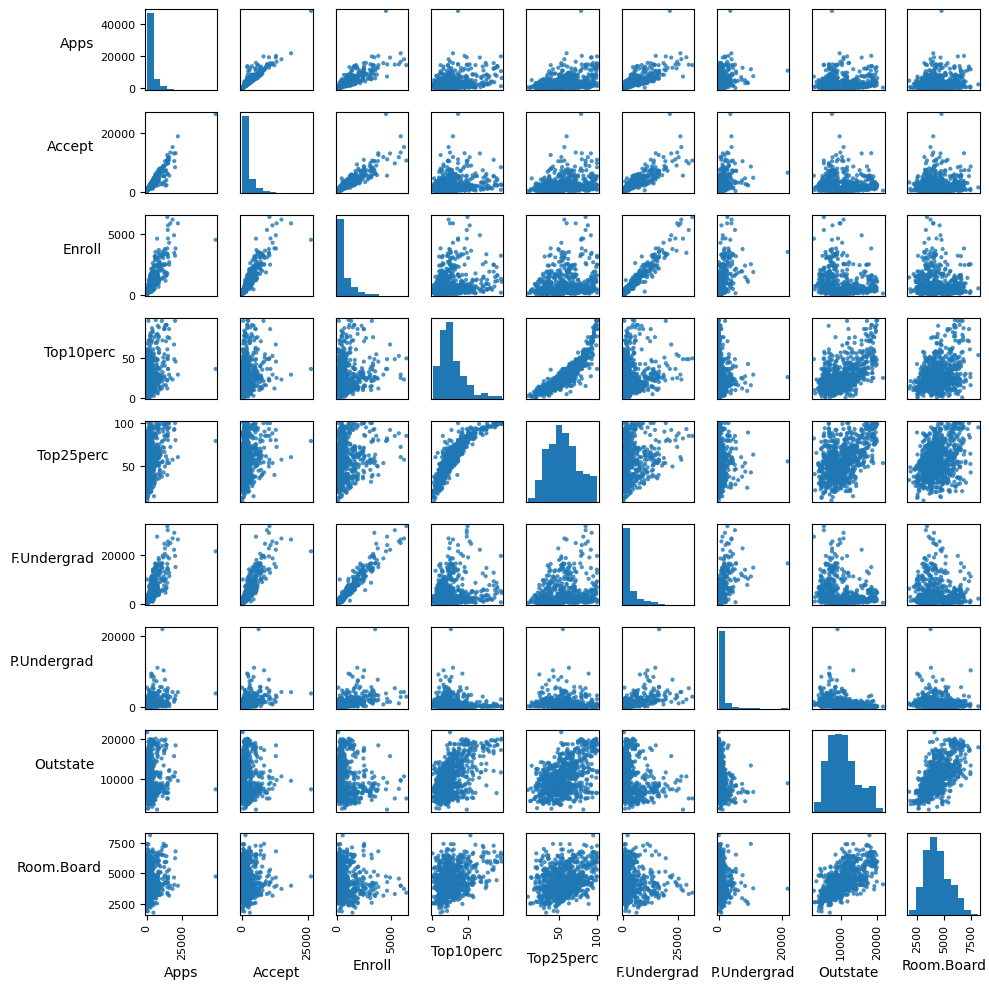

In [8]:
scatter_matrix = pd.plotting.scatter_matrix(college_df.iloc[:, :10], figsize=(10, 10), diagonal='hist', alpha=0.8)
for ax in scatter_matrix.ravel():
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.tight_layout()
plt.show()

### C.iii. Produce a side-by-side boxplot of `Outstate` vs `Private`

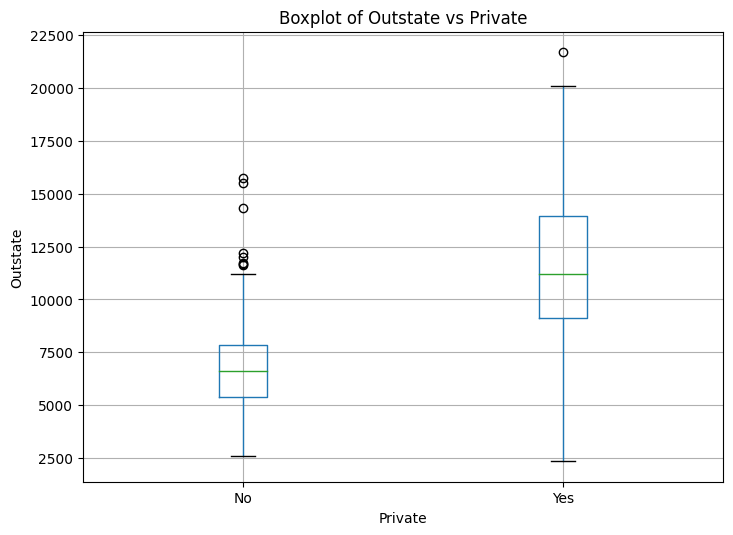

In [9]:
plt.figure(figsize=(8, 6))
college_df.boxplot(column="Outstate", by="Private", ax=plt.gca())
plt.title("Boxplot of Outstate vs Private")
plt.suptitle("")  # Suppress the default title
plt.xlabel("Private")
plt.ylabel("Outstate")
plt.xticks([1, 2], ["No", "Yes"])
plt.show()

### C.iv. Create a new qualitative variable, called Elite, by binning the Top10perc variable.

Divide universities into two groups based on whether or not the proportion of students coming from the top 10 % of their high school classes exceeds 50 %.

In [10]:
college_df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [11]:
college_df["Elite"] = college_df["Top10perc"] > 50

# Convert the boolean values to "Yes" or "No"
college_df["Elite"] = college_df["Elite"].apply(lambda x: "Yes" if x else "No")

In [12]:
# How many elite universities there are
college_df[['Elite']].value_counts()

Elite
No       699
Yes       78
dtype: int64

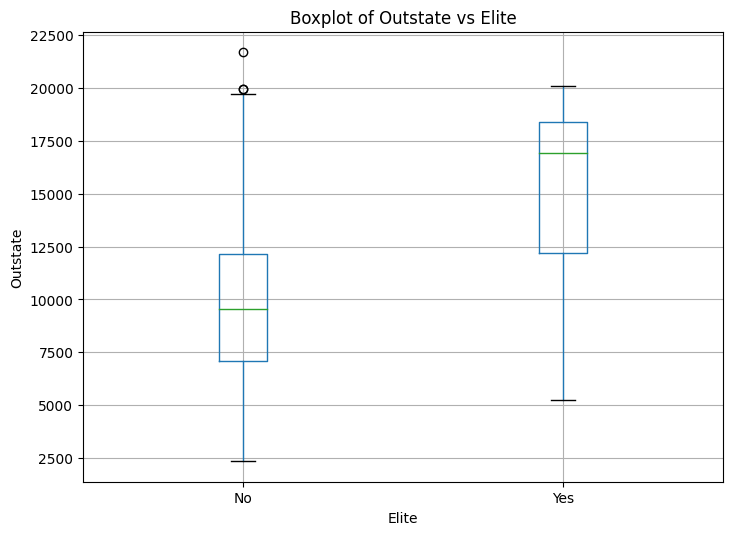

In [13]:
# Produce side-by-side boxplots of Outstate versus Elite.
plt.figure(figsize=(8, 6))
college_df.boxplot(column="Outstate", by="Elite", ax=plt.gca())
plt.title("Boxplot of Outstate vs Elite")
plt.suptitle("")  # Suppress the default title
plt.xlabel("Elite")
plt.ylabel("Outstate")
plt.show()